In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Lectura del documento

In [227]:
data = pd.read_csv('color_iris.csv')

columnas = ['Sepal length','Sepal width','Petal length','Petal widht','Flower']
data.columns=columnas
data

,Sepal length,Sepal width,Petal length,Petal widht,Flower
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


Se cambia el nombre de la flor por números para poder generar una matriz de correlación y ver que columnas están más relacionadas con el tipo de flor

In [228]:
data['Flower'] = data['Flower'].replace('Iris-setosa',0)
data['Flower'] = data['Flower'].replace('Iris-versicolor',1)
data['Flower'] = data['Flower'].replace('Iris-virginica',2)
data

,Sepal length,Sepal width,Petal length,Petal widht,Flower
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


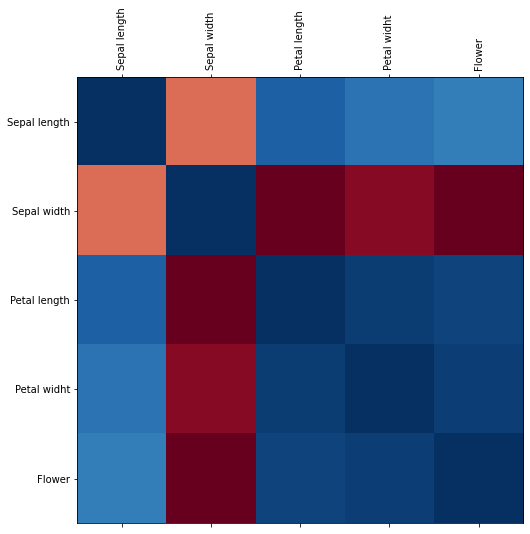

In [229]:
corr = data.corr()

fig = plt.figure(figsize=(8,8))
plt.matshow(corr,cmap = 'RdBu' ,fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

## Separación y mezcla de la data según la flor

In [230]:
data_setosa = data[:49]
data_versicolor = data[49:99]
data_virginica = data[99:]

In [231]:
data_setosa = data_setosa.to_numpy()
np.random.shuffle(data_setosa)
data_setosa = pd.DataFrame(data_setosa)
data_setosa.columns=columnas

In [232]:
data_versicolor = data_versicolor.to_numpy()
np.random.shuffle(data_versicolor)
data_versicolor = pd.DataFrame(data_versicolor)
data_versicolor.columns=columnas

In [233]:
data_virginica = data_virginica.to_numpy()
np.random.shuffle(data_virginica)
data_virginica = pd.DataFrame(data_virginica)
data_virginica.columns=columnas

## Definición de los datos para evaluar y para estimar

In [234]:
def datasets(porcentaje):
  cant = int(50*porcentaje)
  # Se sacan los datasets de cada tipo de flor con la cantidad solicitada para test
  data_setosa_test = data_setosa[:cant]
  data_versicolor_test = data_versicolor[:cant]
  data_virginica_test = data_virginica[:cant]
  data_test = pd.DataFrame()
  data_test = pd.concat([data_setosa_test,data_versicolor_test,data_virginica_test])
  # Se sacan los datasets de cada tipo de flor con la cantidad solicitada para train
  data_setosa_train = data_setosa[cant:]
  data_versicolor_train = data_versicolor[cant:]
  data_virginica_train = data_virginica[cant:]
  data_train = pd.DataFrame()
  data_train = pd.concat([data_setosa_train,data_versicolor_train,data_virginica_train])
  # Se mezclan los datasets para no tener los registros ordenados del train
  data_train = data_train.to_numpy()
  np.random.shuffle(data_train)
  data_train = pd.DataFrame(data_train)
  data_train.columns=columnas
  # Se mezclan los datasets para no tener los registros ordenados del test
  data_test = data_test.to_numpy()
  np.random.shuffle(data_test)
  data_test = pd.DataFrame(data_test)
  data_test.columns=columnas
  return data_test,data_train

### Se define una función para calcular la distancia euclidiana

In [235]:
def euclidiana(test,train):
  distancia = 0
  for i in range(len(test)):
      distancia += (test[i] - train[i]) ** 2
  return math.sqrt(distancia)

### Se define una función para obtener los k vecinos más cercanos

In [236]:
def prediccion(X_train, y_train, X_test, k):
    # Lista para guardar las predicciones
    y_pred = []
    for i in range(len(X_test)):
      # Lista para guardar todas las distancias calculadas
        distancias = []
        for j in range(len(X_train)):
            distancia = euclidiana(X_test[i], X_train[j]) # Se calcula la distancia euclidiana
            distancias.append((distancia, y_train[j])) # Se agrega la distancia calculada
        distancias.sort() # Se ordena la lista de las distancias
        vecinos = distancias[:k] # Se sacan las k distancias más cortas
        # print(vecinos) # Si se quiere ver las distancias de los vecinos más cercanos
        cont = {}
        for vecino in vecinos: # Se realiza la votación para hacer la predicción
            if vecino[1] in cont:
                cont[vecino[1]] += 1
            else:
                cont[vecino[1]] = 1
        y_pred.append(max(cont, key=cont.get)) # Se agrega la predicción a la lista de predicciones
    return y_pred

# Modelo 80-20

## Se generan los datasets de prueba y entrenamiento

In [237]:
data_test,data_train = datasets(0.2) # datasets(train_size)

### Se definen los valores de prueba y entrenamiento

In [238]:
x_train = data_train.iloc[:,[2,3]].values
y_train = data_train.iloc[:,4].values

x_test = data_test.iloc[:,[2,3]].values
y_test = data_test.iloc[:,4].values

### Se ejecuta el KNN y se reportan la cantidad de aciertos y fallos

In [239]:
k=3
y_pred=prediccion(x_train,y_train,x_test,k)
cont = 0
for i in range(len(y_test)):
  if(y_test[i]!=y_pred[i]):
    cont += 1

print('Fallos: ',cont)
print('Aciertos: ',(len(y_test)-cont))

Fallos:  1
Aciertos:  29


In [240]:
k=5
y_pred=prediccion(x_train,y_train,x_test,k)
cont = 0
for i in range(len(y_test)):
  if(y_test[i]!=y_pred[i]):
    cont += 1

print('Fallos: ',cont)
print('Aciertos: ',(len(y_test)-cont))

Fallos:  1
Aciertos:  29


In [241]:
k=7
y_pred=prediccion(x_train,y_train,x_test,k)
cont = 0
for i in range(len(y_test)):
  if(y_test[i]!=y_pred[i]):
    cont += 1

print('Fallos: ',cont)
print('Aciertos: ',(len(y_test)-cont))

Fallos:  1
Aciertos:  29


In [242]:
k=11
y_pred=prediccion(x_train,y_train,x_test,k)
cont = 0
for i in range(len(y_test)):
  if(y_test[i]!=y_pred[i]):
    cont += 1

print('Fallos: ',cont)
print('Aciertos: ',(len(y_test)-cont))

Fallos:  1
Aciertos:  29


In [243]:
k=13
y_pred=prediccion(x_train,y_train,x_test,k)
cont = 0
for i in range(len(y_test)):
  if(y_test[i]!=y_pred[i]):
    cont += 1

print('Fallos: ',cont)
print('Aciertos: ',(len(y_test)-cont))

Fallos:  1
Aciertos:  29


# Modelo 50-50

In [244]:
data_test_50,data_train_50 = datasets(0.5)

In [245]:
x_train_50 = data_train_50.iloc[:,[2,3]].values
y_train_50 = data_train_50.iloc[:,4].values

x_test_50 = data_test_50.iloc[:,[2,3]].values
y_test_50 = data_test_50.iloc[:,4].values

In [246]:
k=7
y_pred_50=prediccion(x_train_50,y_train_50,x_test_50,k)
cont = 0
for i in range(len(y_test_50)):
  if(y_test_50[i]!=y_pred_50[i]):
    cont += 1

print('Fallos: ',cont)
print('Aciertos: ',(len(y_test_50)-cont))

Fallos:  2
Aciertos:  73


# Modelo 75-25

In [247]:
data_test_75,data_train_75 = datasets(0.75)

In [248]:
x_train_75 = data_train_75.iloc[:,[2,3]].values
y_train_75 = data_train_75.iloc[:,4].values

x_test_75 = data_test_75.iloc[:,[2,3]].values
y_test_75 = data_test_75.iloc[:,4].values

In [249]:
k=7
y_pred_75=prediccion(x_train_75,y_train_75,x_test_75,k)
cont = 0
for i in range(len(y_test_75)):
  if(y_test_75[i]!=y_pred_75[i]):
    cont += 1

print('Fallos: ',cont)
print('Aciertos: ',(len(y_test_75)-cont))

Fallos:  6
Aciertos:  105
